In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load('../data/music/Queen/Queen - Flash.mp3', duration=0.5)

帧与时间对应关系

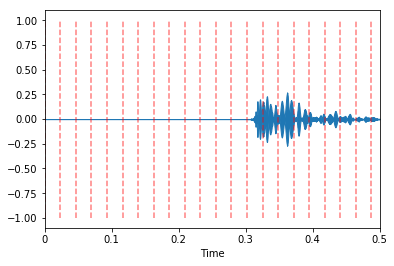

In [3]:
frames = librosa.core.samples_to_frames(np.arange(0, y.shape[0], 512))
times = librosa.core.frames_to_time(frames)

plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.vlines(times, -1, 1, color='r', alpha=0.5, linestyle='--')
plt.show()

In [4]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

hop_length = 512

frames = librosa.core.samples_to_frames(np.arange(0, y.shape[0], hop_length))
times = librosa.core.frames_to_time(frames)

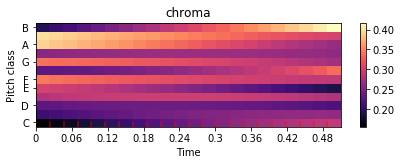

In [5]:
plt.subplot(2,1,2)
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.vlines(times, -1, 1, color='r', alpha=0.5, linestyle='--', label='Beats')

plt.title('chroma')
plt.colorbar()
plt.tight_layout()
plt.show()

In [6]:
y, sr = librosa.load('../data/music/Carole King/Carole King - I Feel The Earth Move.mp3')

In [7]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
chroma_cens = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)

基于帧的特征值与时间对应关系

In [8]:
hop_length = 512

frames = librosa.core.samples_to_frames(np.arange(0, y.shape[0], hop_length))
start_times = librosa.core.frames_to_time(frames)
end_times = np.r_[start_times[1:], np.array([librosa.get_duration(y, sr=sr)])]

In [9]:
import pandas as pd

In [10]:
chroma = np.concatenate((chroma_cens, start_times.reshape(1, start_times.shape[0])), axis=0)
chroma = np.concatenate((chroma, end_times.reshape(1, end_times.shape[0])), axis=0)
data_frame = pd.DataFrame(chroma).T
data_frame.to_csv('I Feel The Earth Move.csv', mode='w', header=False, index=False)

In [11]:
chroma = pd.read_csv('I Feel The Earth Move.csv', header=None)
chroma

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.150994,0.076596,0.026385,0.062669,0.116982,0.096366,0.122805,0.375088,0.276019,0.421527,0.552951,0.477850,0.000000,0.023220
1,0.156190,0.086960,0.034985,0.067703,0.113834,0.094010,0.123971,0.369228,0.277684,0.424610,0.548536,0.480049,0.023220,0.046440
2,0.163824,0.098659,0.044463,0.072791,0.110846,0.091624,0.125490,0.363196,0.278565,0.426296,0.543516,0.482779,0.046440,0.069660
3,0.173870,0.111677,0.054645,0.077832,0.107946,0.089177,0.127403,0.357051,0.278626,0.426564,0.537709,0.486015,0.069660,0.092880
4,0.186307,0.126001,0.065297,0.082744,0.105071,0.086641,0.129739,0.350821,0.277822,0.425373,0.530945,0.489714,0.092880,0.116100
5,0.201115,0.141617,0.076231,0.087455,0.102167,0.083988,0.132513,0.344504,0.276098,0.422656,0.523051,0.493815,0.116100,0.139320
6,0.218264,0.158496,0.087279,0.091892,0.099180,0.081187,0.135724,0.338070,0.273374,0.418306,0.513916,0.498212,0.139320,0.162540
7,0.237708,0.176591,0.098281,0.095981,0.096061,0.078210,0.139362,0.331477,0.269562,0.412201,0.503418,0.502785,0.162540,0.185760
8,0.259383,0.195834,0.109074,0.099728,0.092771,0.075034,0.143414,0.324692,0.264577,0.404224,0.491364,0.507407,0.185760,0.208980
9,0.283173,0.216112,0.119565,0.103199,0.089270,0.071636,0.147761,0.317660,0.258321,0.394232,0.477626,0.511904,0.208980,0.232200


标注文件

In [12]:
labs = pd.read_table('../data/music/Carole King Annotations/chordlab/Carole King/01 I Feel The Earth Move.lab',
                    sep='\t', header=None)
labs

,0,1,2
0,0.000,0.000,N
1,0.000,0.401,N
2,0.401,3.235,C:min7
3,3.235,3.763,F/5
4,3.763,4.027,C:min7
5,4.027,4.532,F/5
6,4.532,7.328,C:min7
7,7.328,7.790,F/5
8,7.790,8.069,C:min7
9,8.069,8.547,F/5


In [13]:
cur = 0
max = labs.iloc[:, 0].size

features = []
for index in chroma.index:
    lab = labs.iloc[cur].values
    frame_times = chroma.iloc[index].values[-2:]
    if frame_times[1] <= float(lab[1]):
        feature = []
        feature.extend(chroma.iloc[index].values[:-2])
        feature.append(lab[-1])
        features.append(feature)
    else:
        if (cur + 1) < max:
            cur += 1
            lab = labs.iloc[cur].values
        else:
            break

pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.156190,0.086960,0.034985,0.067703,0.113834,0.094010,0.123971,0.369228,0.277684,0.424610,0.548536,0.480049,N
1,0.163824,0.098659,0.044463,0.072791,0.110846,0.091624,0.125490,0.363196,0.278565,0.426296,0.543516,0.482779,N
2,0.173870,0.111677,0.054645,0.077832,0.107946,0.089177,0.127403,0.357051,0.278626,0.426564,0.537709,0.486015,N
3,0.186307,0.126001,0.065297,0.082744,0.105071,0.086641,0.129739,0.350821,0.277822,0.425373,0.530945,0.489714,N
4,0.201115,0.141617,0.076231,0.087455,0.102167,0.083988,0.132513,0.344504,0.276098,0.422656,0.523051,0.493815,N
5,0.218264,0.158496,0.087279,0.091892,0.099180,0.081187,0.135724,0.338070,0.273374,0.418306,0.513916,0.498212,N
6,0.237708,0.176591,0.098281,0.095981,0.096061,0.078210,0.139362,0.331477,0.269562,0.412201,0.503418,0.502785,N
7,0.259383,0.195834,0.109074,0.099728,0.092771,0.075034,0.143414,0.324692,0.264577,0.404224,0.491364,0.507407,N
8,0.283173,0.216112,0.119565,0.103199,0.089270,0.071636,0.147761,0.317660,0.258321,0.394232,0.477626,0.511904,N
9,0.308892,0.237255,0.129706,0.106434,0.085520,0.067997,0.152198,0.310243,0.250692,0.382159,0.462151,0.516059,N


In [28]:
music_dir = '../data/The_Beatles'
lab_dir = '../data/chordlab/The Beatles'
feature_dir = '../data/feature/The Beatles'
hop_length = 512

In [49]:
import os
import librosa
import numpy as np
import pandas as pd

for beatles_dir in os.listdir(music_dir):
    for music in os.listdir(music_dir+'/'+beatles_dir):
        print('-------------',beatles_dir+'/'+music,'-----------------')
        y, sr = librosa.load(music_dir+'/'+beatles_dir+'/'+music)
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        chroma_cens = librosa.feature.chroma_cens(y=y_harmonic, sr=sr, hop_length=hop_length)
        
        print(y_harmonic.shape)
        frames = librosa.core.samples_to_frames(np.arange(0, y_harmonic.shape[0]+1, hop_length))
        print(frames)
        start_times = librosa.core.frames_to_time(frames)
        end_times = np.r_[start_times[1:], np.array([librosa.get_duration(y_harmonic, sr=sr)])]
        
        tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
        beat_times = librosa.frames_to_time(beat_frames, sr=sr)
        beat_chroma = librosa.util.sync(chroma_cens, beat_frames, aggregate=np.median)
        beat_times = np.insert(beat_times, 0, 0)
        
        print(chroma_cens.shape)
        print(start_times.shape)
        
        chroma_start = np.concatenate((chroma_cens, start_times.reshape(1, start_times.shape[0])), axis=0)
        chroma_end = np.concatenate((chroma_start, end_times.reshape(1, end_times.shape[0])), axis=0)
        chroma_frame = pd.DataFrame(chroma_end).T
        
        chroma_beat_time = np.concatenate((beat_chroma, beat_times.reshape(1, beat_times.shape[0])), axis=0)
        chroma_beat = pd.DataFrame(chroma_beat_time).T
        
        labs = pd.read_table(lab_dir+'/'+beatles_dir+'/'+music.split('.flac')[0]+'.lab', sep=' ', header=None)
        
        cur = 0
        max = labs.iloc[:, 0].size
        feature_frame = []
        
        for index in chroma_frame.index:
            lab = labs.iloc[cur].values
            frame_times = chroma_frame.iloc[index].values[-2:]
            if frame_times[1] <= float(lab[1]):
                feature = []
                feature.extend(chroma_frame.iloc[index].values[:-2])
                feature.append(lab[-1])
                feature_frame.append(feature)
            elif (cur + 1) < max:
                cur += 1
                lab = labs.iloc[cur].values
            else:
                break
        
        cur = 0
        max = labs.iloc[:, 0].size
        feature_beat = []
        
        for index in chroma_beat.index:
            lab = labs.iloc[cur].values
            time = chroma_beat.iloc[index].values[-1]
            if time < float(lab[1]):
                feature = []
                feature.extend(chroma_beat.iloc[index].values[:-1])
                feature.append(lab[-1])
                feature_beat.append(feature)
            elif (cur + 1) < max:
                cur += 1
                lab = labs.iloc[cur].values
                feature = []
                feature.extend(chroma_beat.iloc[index].values[:-1])
                feature.append(lab[-1])
                feature_beat.append(feature)
            else:
                break
        
        feature_frame = pd.DataFrame(feature_frame)
        feature_beat = pd.DataFrame(feature_beat)
        
        frame_dir = feature_dir+'/'+'frame'+'/'+beatles_dir
        beat_dir = feature_dir+'/'+'beat'+'/'+beatles_dir
        if not os.path.exists(frame_dir):
            os.makedirs(frame_dir)
        if not os.path.exists(beat_dir):
            os.makedirs(beat_dir)

     
        feature_frame.to_csv(feature_dir+'/'+'frame'+'/'+beatles_dir+'/'+music.split('.flac')[0]+'.csv',
                        mode='w', header=False, index=False)
        feature_beat.to_csv(feature_dir+'/'+'beat'+'/'+beatles_dir+'/'+music.split('.flac')[0]+'.csv',
                        mode='w', header=False, index=False)

------------- 02_-_With_the_Beatles/05_-_Little_Child.flac -----------------
(2381400,)
[   0    1    2 ... 4649 4650 4651]
(12, 4652)
(4652,)


FileNotFoundError: File b'../data/chordlab/The Beatles/02_-_With_the_Beatles/05_-_Little_Child.lab' does not exist